In [44]:
from requests import get
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [28]:
url = "https://data.cityofchicago.org/resource/crimes.json?$order=date%20DESC&$limit=1250000"
response = get(url, headers={"X-App-Token":"eQexwCiZsieQyjfCAdnzDBlUs"})
print(response.status_code)

200


In [29]:
def get_info():
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

data = get_info()

In [30]:
Crime = pd.DataFrame(data)

In [31]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250000 entries, 0 to 1249999
Data columns (total 22 columns):
arrest                  1250000 non-null bool
beat                    1250000 non-null object
block                   1250000 non-null object
case_number             1250000 non-null object
community_area          1249998 non-null object
date                    1250000 non-null object
description             1250000 non-null object
district                1249999 non-null object
domestic                1250000 non-null bool
fbi_code                1250000 non-null object
id                      1250000 non-null object
iucr                    1250000 non-null object
latitude                1216157 non-null object
location                1216157 non-null object
location_description    1246070 non-null object
longitude               1216157 non-null object
primary_type            1250000 non-null object
updated_on              1250000 non-null object
ward                    124

In [52]:
Crime.date.min(), Crime.date.max()

('2014-09-22T19:22:00.000', '2019-06-11T23:59:00.000')

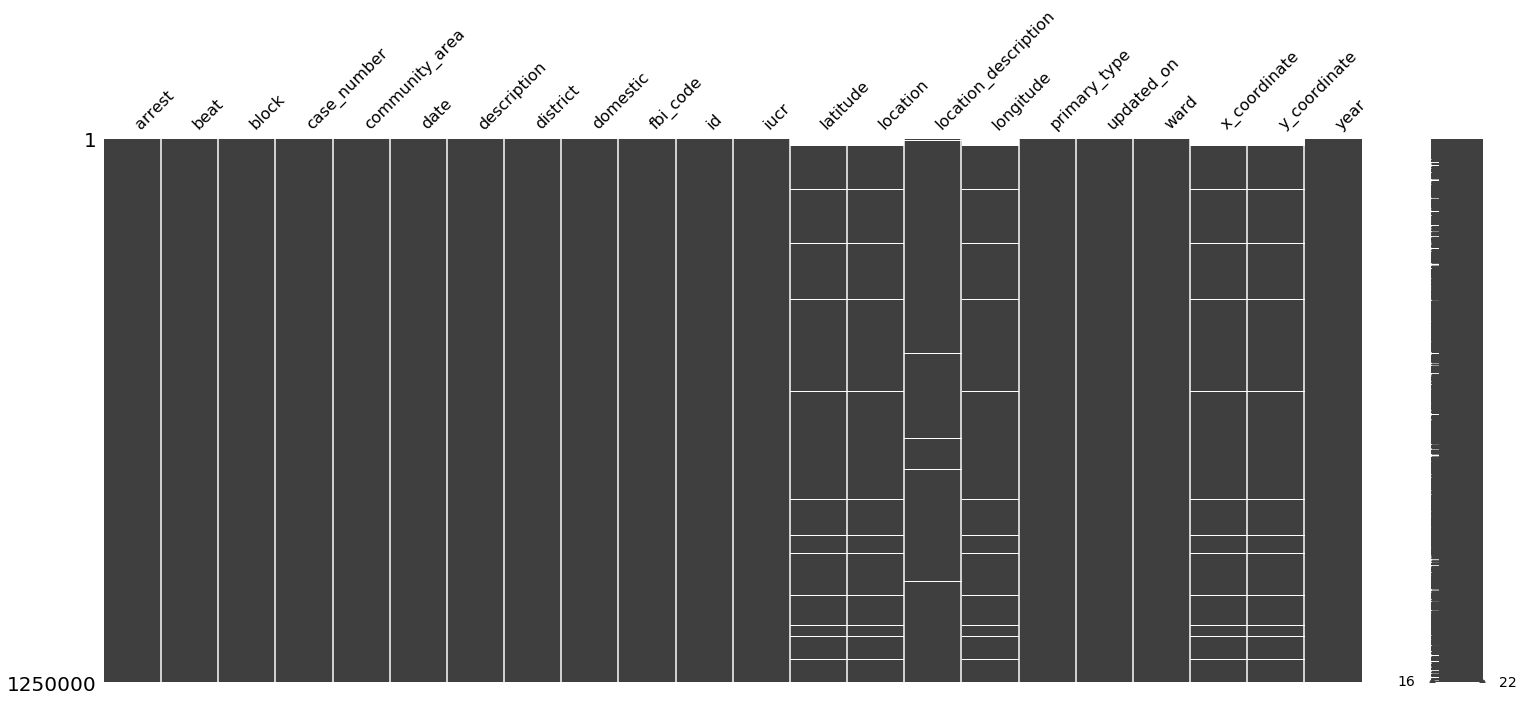

In [45]:
msno.matrix(Crime)

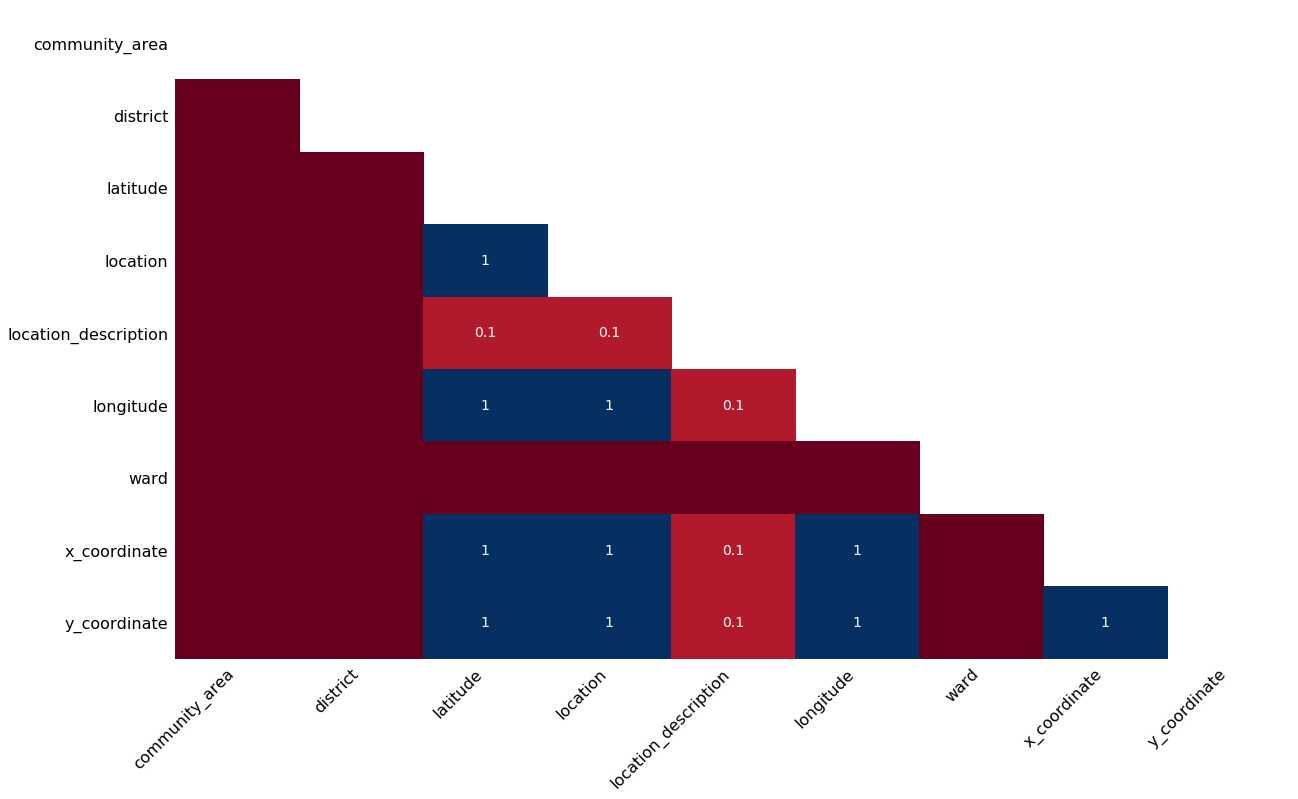

In [50]:
msno.heatmap(Crime)

In [56]:
#Crime[Crime.community_area.isnull()]

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
167726,False,0924,012XX W 46TH ST,JB469238,NaN,2018-10-09T19:45:00.000,SIMPLE,009,False,08A,...,41.81056815,"{'latitude': '41.81056815', 'longitude': '-87....",ALLEY,-87.656973332,ASSAULT,2018-10-16T16:10:15.000,20,1168638,1874287,2018
265278,False,1233,015XX W 15TH PL,JB298957,NaN,2018-06-08T19:00:00.000,NON-AGGRAVATED,012,False,02,...,41.860577113,"{'latitude': '41.860577113', 'longitude': '-87...",PARK PROPERTY,-87.664977927,CRIM SEXUAL ASSAULT,2018-06-15T16:08:10.000,28,1166314,1892493,2018


In [59]:
Crime.dropna(inplace=True)

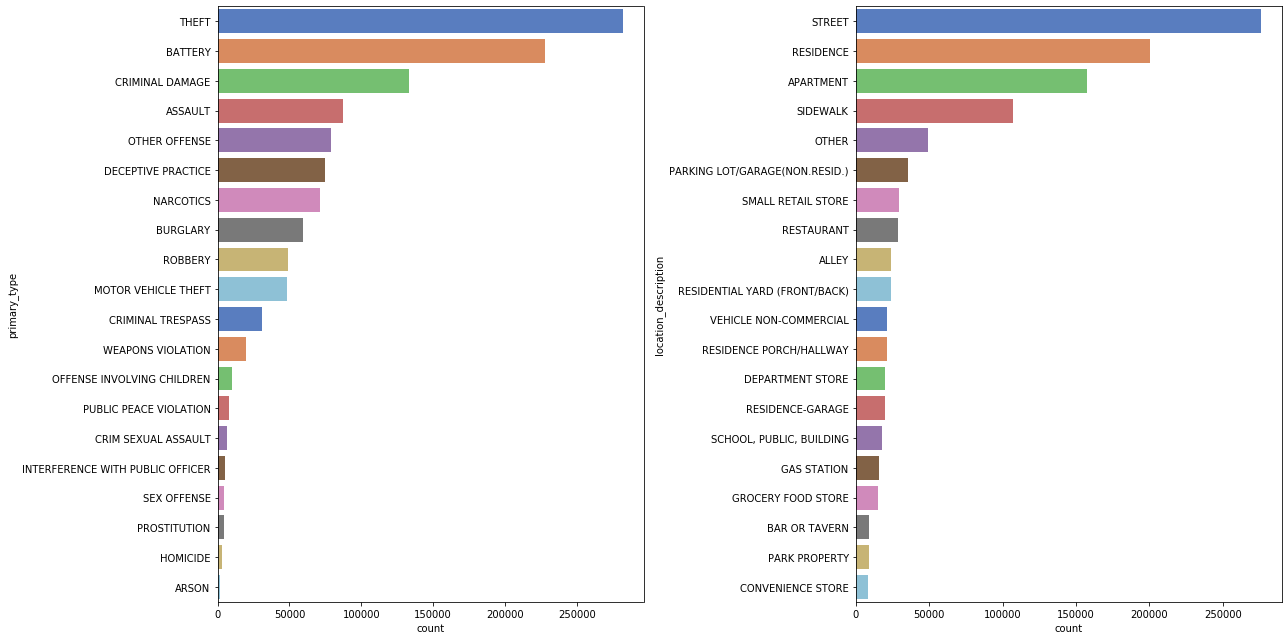

In [104]:
fig, ax =plt.subplots(1,2, figsize=(18,9))

sns.countplot(y= 'primary_type', data = Crime, palette = 'muted', order = Crime['primary_type'].value_counts().iloc[:20].index, ax=ax[0])
sns.countplot(y= 'location_description', data = Crime, palette = 'muted', order = Crime['location_description'].value_counts().iloc[:20].index, ax=ax[1])
plt.tight_layout()
plt.show()

